In [231]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import joblib

## loading dataset

In [232]:
df = pd.read_csv('credit_risk_dataset.csv')

In [233]:
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


## looking at the dataset

In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [235]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [236]:
df.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

if we get rid of the entries with na values we could loose up to 4000 entries (approx) this leaves approx 28,000 entries which is still more than enough

In [237]:
df = df.dropna()

In [238]:
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [239]:
print(df['loan_status'].value_counts())

loan_status
0    22435
1     6203
Name: count, dtype: int64


we can see that default entries are a minority so we may need some sampling when training our set

## cleaning the data for use

In [240]:
# encoding catagorical cols 
label_encoder = preprocessing.LabelEncoder() 

catagorical_cats_tr = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']

# printing mappings
for col in catagorical_cats_tr:
    df.loc[:,col] = label_encoder.fit_transform(df[col])
    
    
    mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
    print(f"Column: {col}")
    print("Mapping:", mapping)
    print()

Column: person_home_ownership
Mapping: {'MORTGAGE': 0, 'OTHER': 1, 'OWN': 2, 'RENT': 3}

Column: loan_intent
Mapping: {'DEBTCONSOLIDATION': 0, 'EDUCATION': 1, 'HOMEIMPROVEMENT': 2, 'MEDICAL': 3, 'PERSONAL': 4, 'VENTURE': 5}

Column: loan_grade
Mapping: {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6}

Column: cb_person_default_on_file
Mapping: {'N': 0, 'Y': 1}



In [241]:
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,3,123.0,4,3,35000,16.02,1,0.59,1,3
1,21,9600,2,5.0,1,1,1000,11.14,0,0.10,0,2
2,25,9600,0,1.0,3,2,5500,12.87,1,0.57,0,3
3,23,65500,3,4.0,3,2,35000,15.23,1,0.53,0,2
4,24,54400,3,8.0,3,2,35000,14.27,1,0.55,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,0,1.0,4,2,5800,13.16,0,0.11,0,30
32577,54,120000,0,4.0,4,0,17625,7.49,0,0.15,0,19
32578,65,76000,3,3.0,2,1,35000,10.99,1,0.46,0,28
32579,56,150000,0,5.0,4,1,15000,11.48,0,0.10,0,26


## EDA

### looking at distribution of different features 

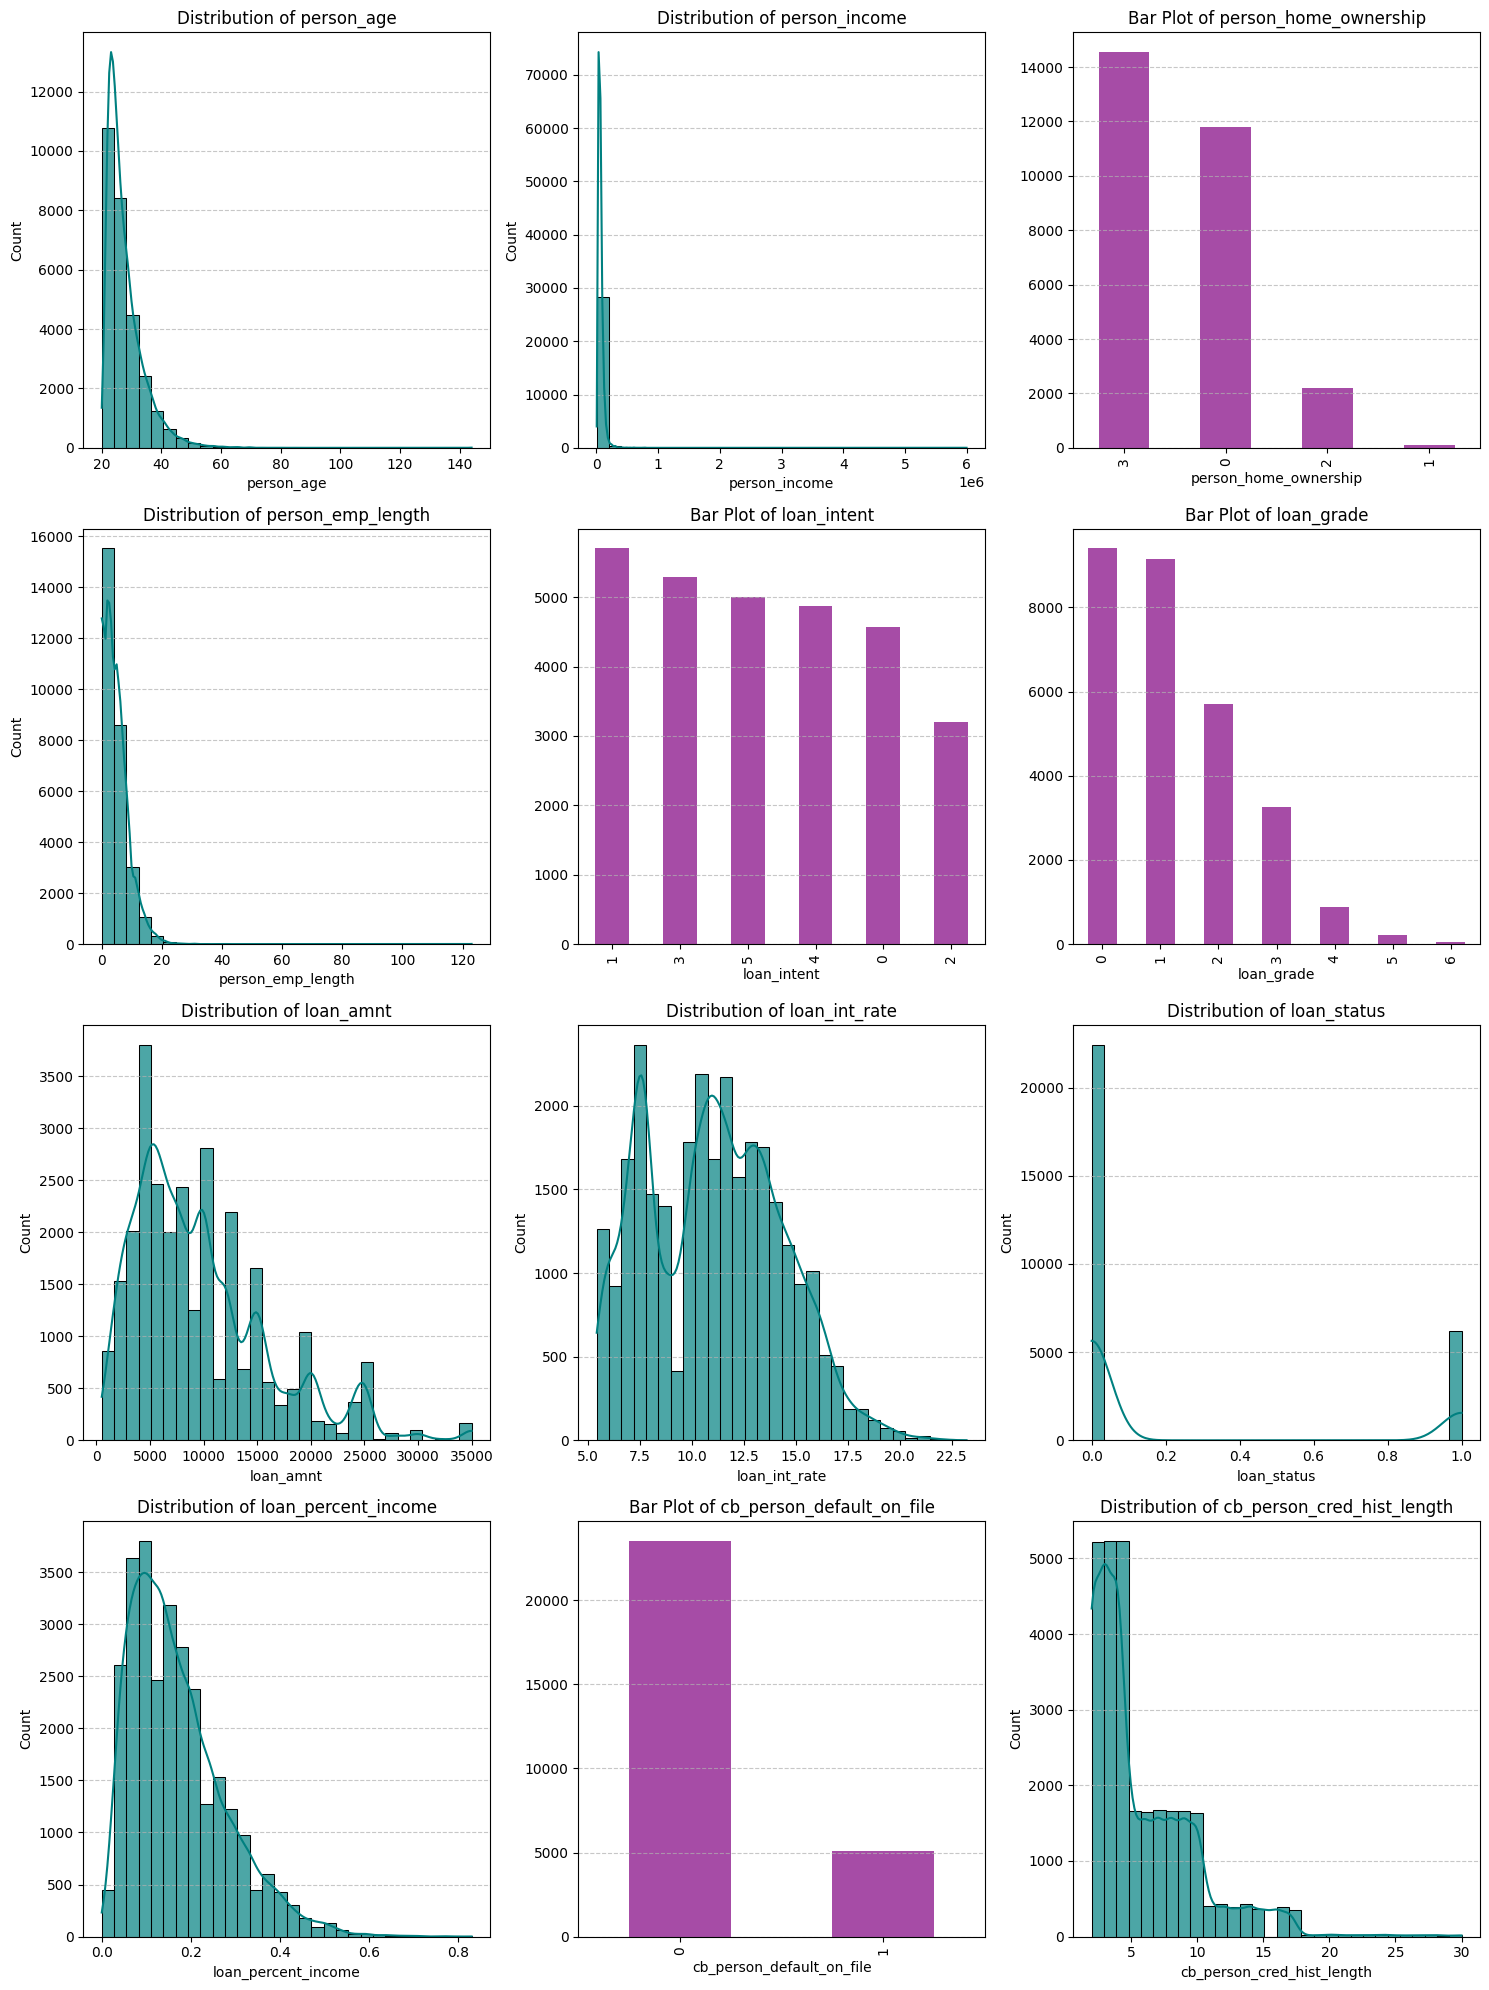

In [242]:
def plot_distributions(df):

    # working out how many rows in subplot
    n_cols = len(df.columns)
    n_rows = (n_cols // 3 + (n_cols % 3 > 0))  

    # making subplots 
    fig, axes = plt.subplots(n_rows, 3, figsize=(15, n_rows * 5))
    axes = axes.flatten()  
    
    # itterating over columns 
    for i, col in enumerate(df.columns):
        ax = axes[i]

        # plot for numerical cols
        if df[col].dtype in ['int64', 'float64']:  
            sns.histplot(df[col], kde=True, ax=ax, color='teal', bins=30, alpha=0.7)
            ax.set_title(f"Distribution of {col}")
        
        # plot for catagorical cols 
        else:  
            df[col].value_counts().plot(kind='bar', ax=ax, color='purple', alpha=0.7)
            ax.set_title(f"Bar Plot of {col}")
        
        # adding a grid
        ax.grid(axis='y', linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    plt.show()


plot_distributions(df)

### comparing loan_status with different features (kde)

In [243]:
def loan_status_comparison_kde(X):
    plt.figure(figsize=(12, 6))

   # plot kde plot for numerical data vs loan default      
    sns.kdeplot(data=df, x=X, hue='loan_status', fill=True, palette='Set2', alpha=0.5)
    plt.xlim(0, df[X].quantile(0.999))  # allows the axis to fit the current data 
        
    plt.title(f'Loan Default vs {X} (KDE)', fontsize=16)
    plt.xlabel(f'{X}', fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend(title='Loan Default', labels=['Default', 'No Default'])
    plt.show()

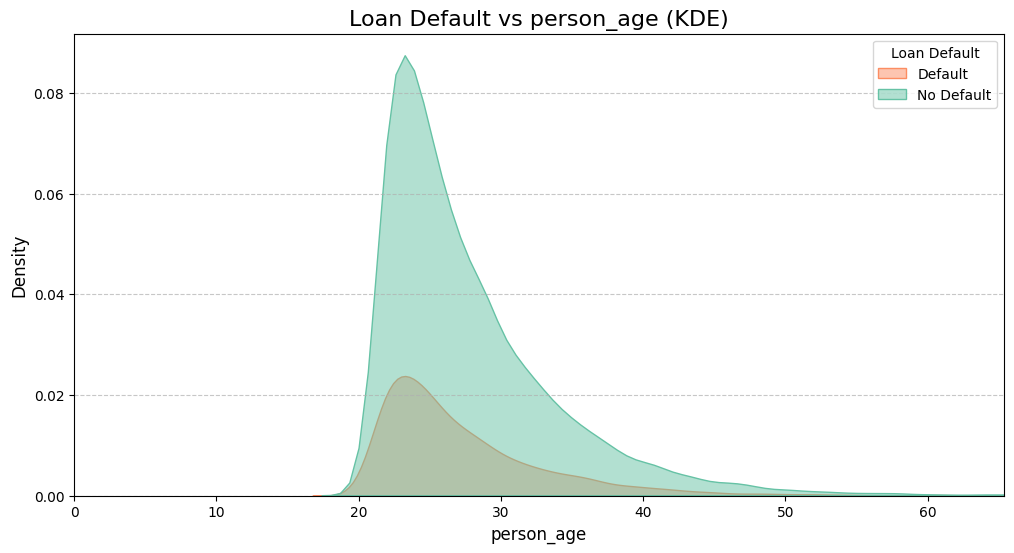

In [244]:
loan_status_comparison_kde('person_age')

- density of defaults highly concentrated around 20-30 year olds 

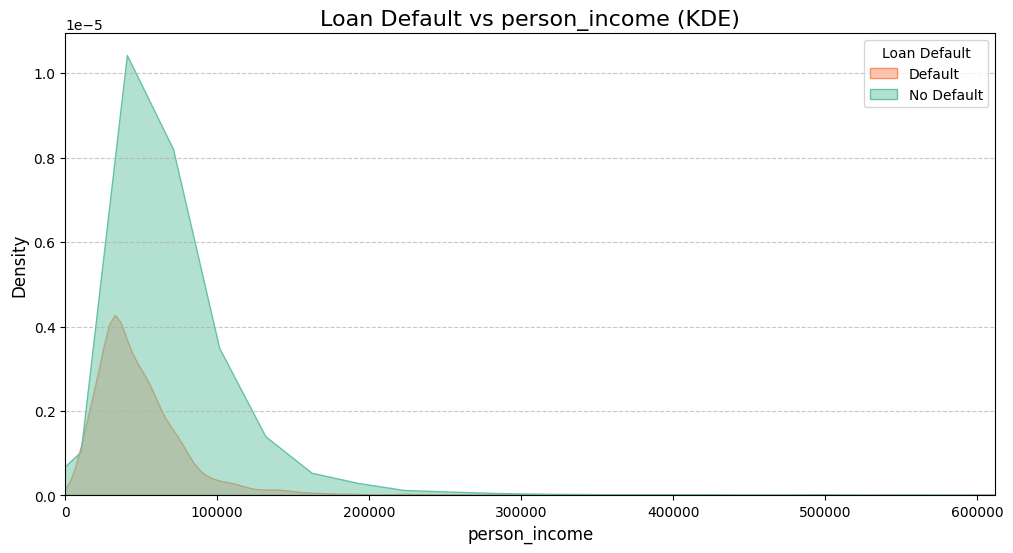

In [245]:
loan_status_comparison_kde('person_income')

- density for defaults most concentrated around 20,000 - 60,000 (approx)

### comparing loan_status with different features (bar)

In [246]:
def loan_status_comparison_bar(X):
    # groups feature and loan status 
    grouped_data = df.groupby([X, 'loan_status']).size().reset_index(name='count')
    
    # plot barplot 
    plt.figure(figsize=(10, 6))
    sns.barplot(data=grouped_data, x=X, y='count', hue='loan_status', palette='Set2')
    
    plt.title(f'Loan Status vs {X}', fontsize=16)
    plt.xlabel(f'{X}', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.legend(title='Loan Status', labels=['No Default (0)', 'Default (1)'])
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()



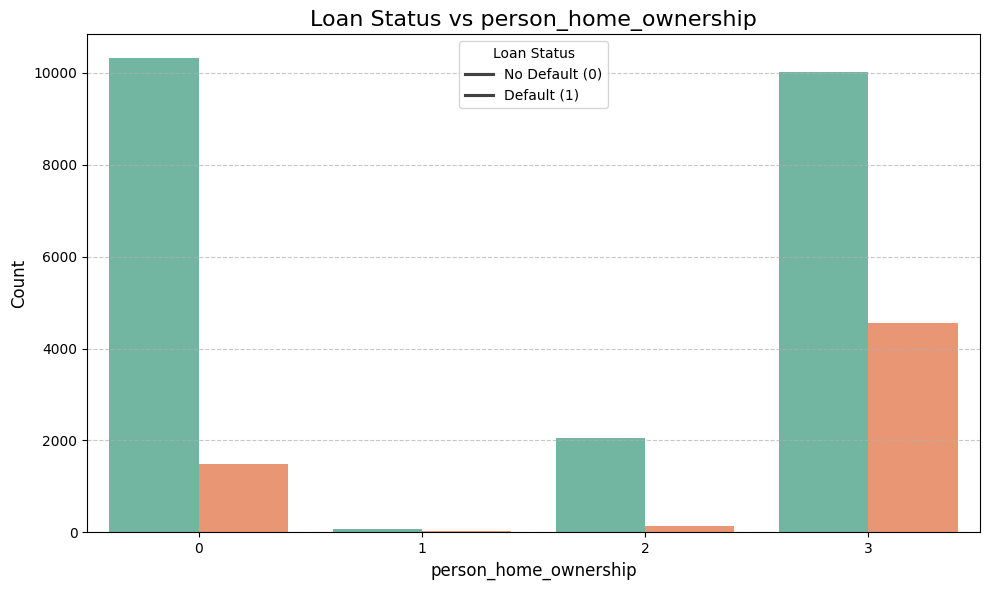

In [247]:
loan_status_comparison_bar('person_home_ownership')

note:
Column: person_home_ownership<br>
Mapping: {'MORTGAGE': 0, 'OTHER': 1, 'OWN': 2, 'RENT': 3}

- renters have more defaults than other groups followed by mortgage

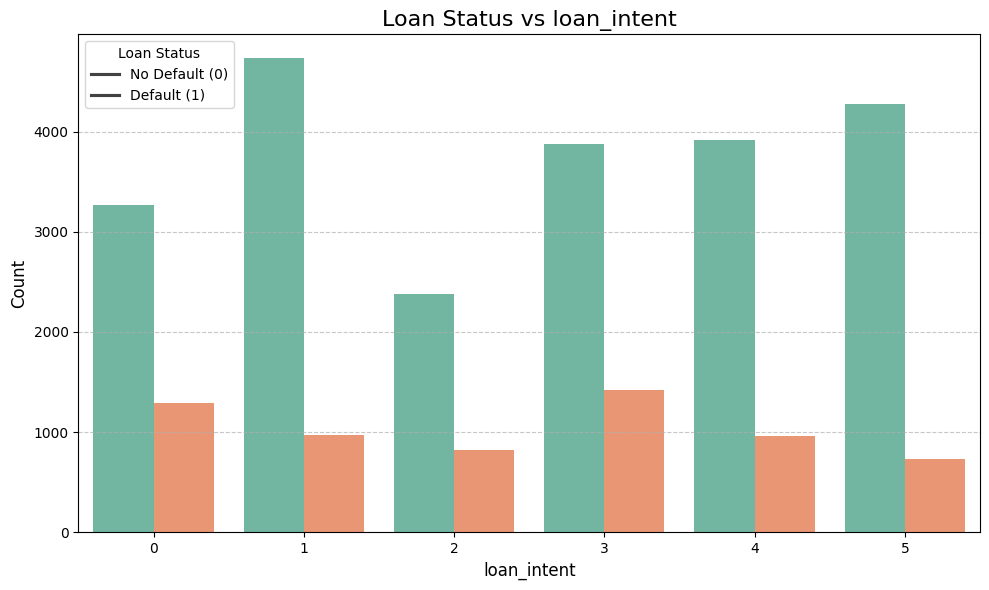

In [248]:
loan_status_comparison_bar('loan_intent')

note:

Column: loan_intent<br>
Mapping: {'DEBTCONSOLIDATION': 0, 'EDUCATION': 1, 'HOMEIMPROVEMENT': 2, 'MEDICAL': 3, 'PERSONAL': 4, 'VENTURE': 5}


- debt consolidation and medical have highest amount of defaults

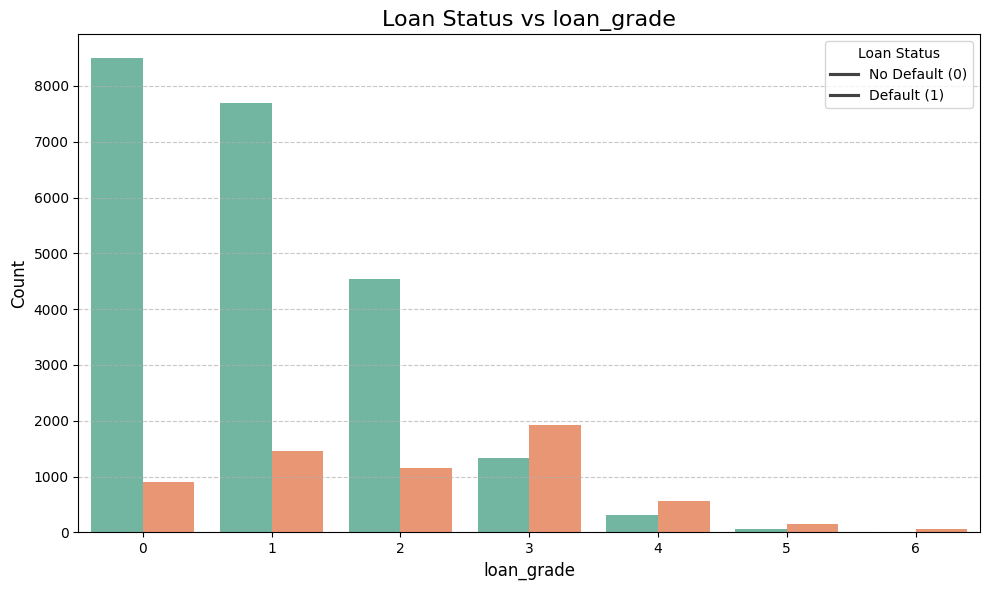

In [249]:
loan_status_comparison_bar('loan_grade')

note: 

Column: loan_grade<br>
Mapping: {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6}

- load grade D has the most defaults by far (more than not defaulting)

## Confusion matrix

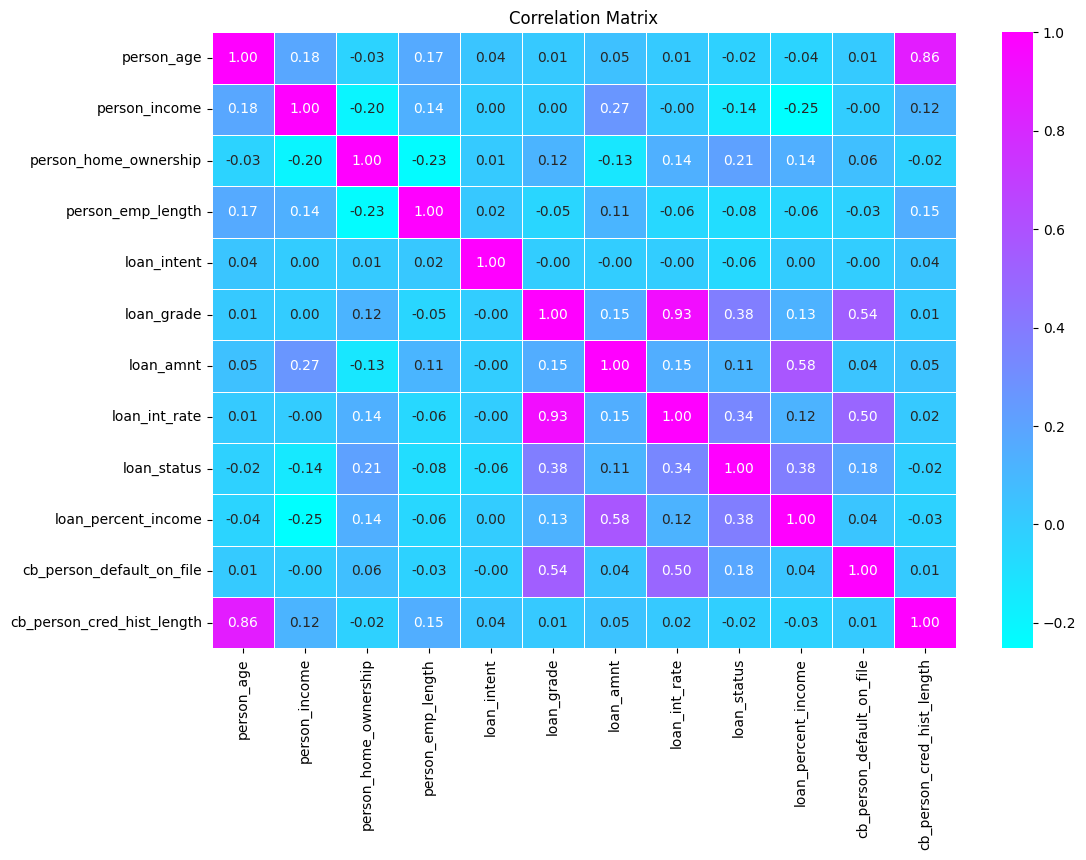

In [250]:
correlation_matrix = df.corr()


plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='cool', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

## Splitting the data 

In [251]:
X = df.drop(columns=['loan_status'])
y = df['loan_status']

In [252]:
# sampling to account for minority 
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)

In [253]:
print("Before Oversampling:", y.value_counts())
print("After Oversampling:", pd.Series(y_resampled).value_counts())

Before Oversampling: loan_status
0    22435
1     6203
Name: count, dtype: int64
After Oversampling: loan_status
1    22435
0    22435
Name: count, dtype: int64


In [254]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=123)

In [255]:
models = [RandomForestClassifier(random_state=123, n_estimators=100), LogisticRegression(random_state=123, max_iter=1000), 
          DecisionTreeClassifier(random_state=123)]

In [256]:
print(f"Length of X_train: {len(X_train)}")
print(f"Length of y_train: {len(y_train)}")

Length of X_train: 31409
Length of y_train: 31409


Best model saved
-----------------

Model 1: RandomForestClassifier
Training Accuracy: 1.0
Testing Accuracy: 0.9784562811083872



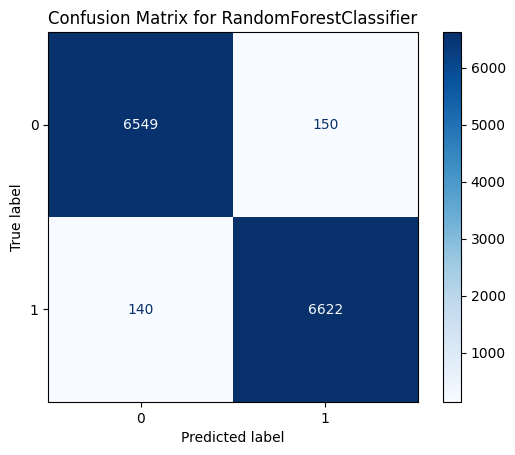


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      6699
           1       0.98      0.98      0.98      6762

    accuracy                           0.98     13461
   macro avg       0.98      0.98      0.98     13461
weighted avg       0.98      0.98      0.98     13461

-----------------

-----------------

Model 2: LogisticRegression
Training Accuracy: 0.7527778662166895
Testing Accuracy: 0.7584874823564371



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


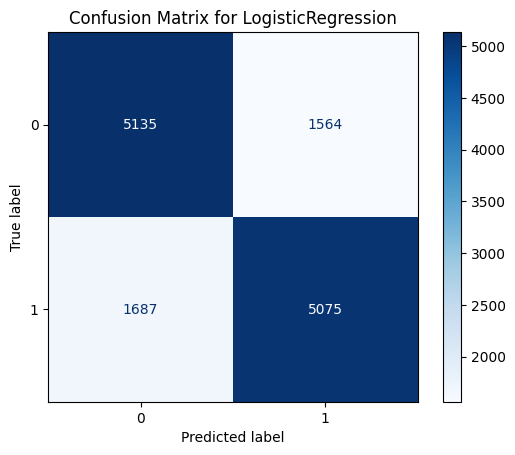


Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.77      0.76      6699
           1       0.76      0.75      0.76      6762

    accuracy                           0.76     13461
   macro avg       0.76      0.76      0.76     13461
weighted avg       0.76      0.76      0.76     13461

-----------------

-----------------

Model 3: DecisionTreeClassifier
Training Accuracy: 1.0
Testing Accuracy: 0.9454721045984696



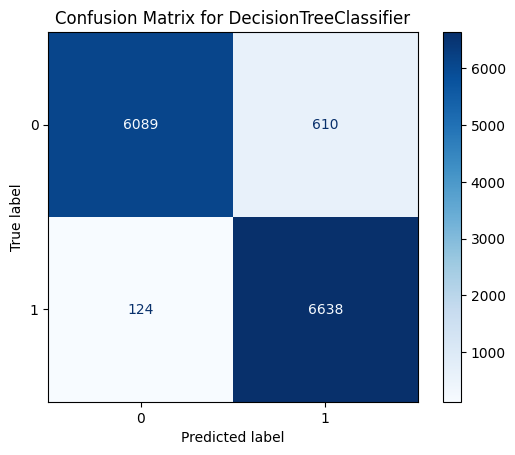


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.91      0.94      6699
           1       0.92      0.98      0.95      6762

    accuracy                           0.95     13461
   macro avg       0.95      0.95      0.95     13461
weighted avg       0.95      0.95      0.95     13461

-----------------



In [257]:
for i, model in enumerate(models):
    
    model.fit(X_train, y_train)

    if isinstance(model, RandomForestClassifier):
        joblib.dump(model, 'cred_risk_best_model.pkl')
        print('Best model saved')

    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))   

    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    print("-----------------")
    print()
    print(f"Model {i+1}: {type(model).__name__}")
    print(f"Training Accuracy: {train_accuracy}")
    print(f"Testing Accuracy: {test_accuracy}")
    print()
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap='Blues', values_format='d')
    plt.title(f'Confusion Matrix for {type(model).__name__}')
    plt.show()
    print("\nClassification Report:")
    print(class_report)
    print("-----------------")
    print()

- random forest classifier outperforms the other models